In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("HR-Employee-Attrition.csv")

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   str  
 2   BusinessTravel            1470 non-null   str  
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   str  
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   str  
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   str  
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null   int64
 15

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## EDA - exploratory data analysis

[]

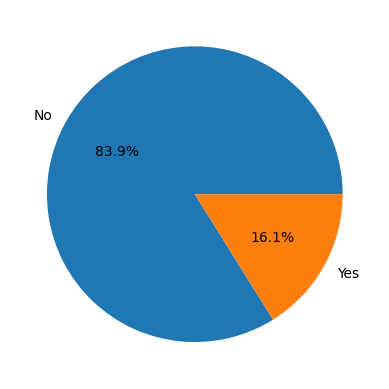

In [7]:
classes_count = df['Attrition'].value_counts()

plt.pie(classes_count, labels=['No', 'Yes'], autopct="%1.1f%%")
plt.plot()

<Axes: xlabel='Attrition', ylabel='Age'>

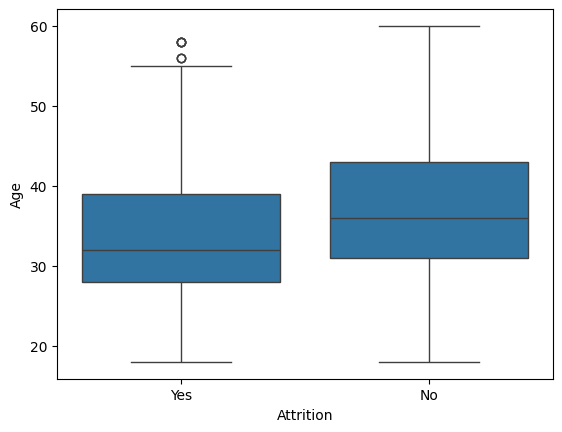

In [8]:
sns.boxplot(x='Attrition', y='Age', data=df)

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

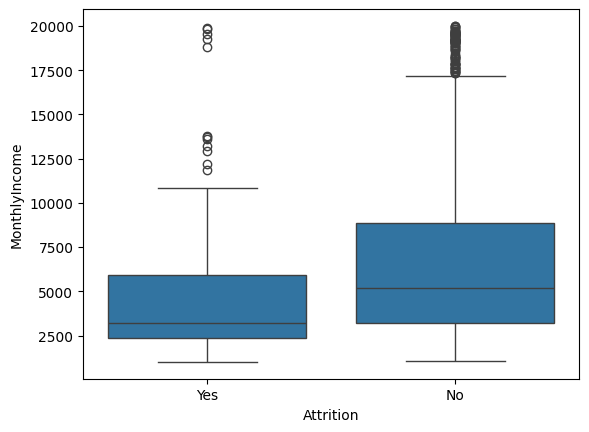

In [9]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)

<Axes: xlabel='Attrition', ylabel='DailyRate'>

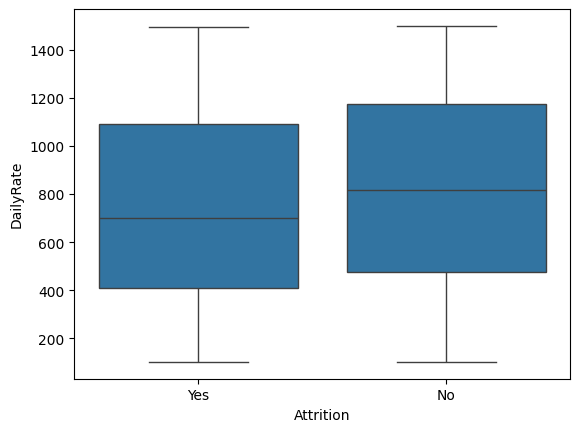

In [10]:
sns.boxplot(x = 'Attrition', y='DailyRate', data=df)

<Axes: xlabel='Attrition', ylabel='DistanceFromHome'>

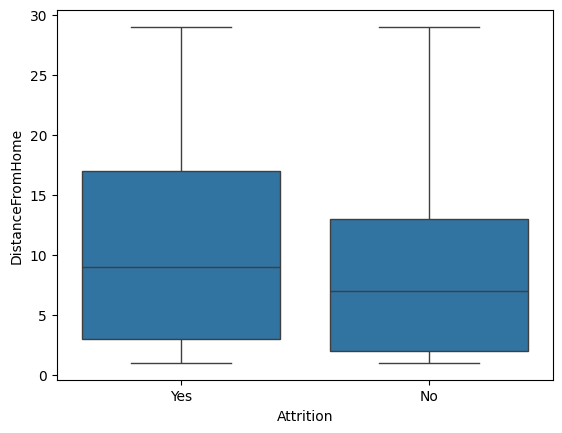

In [11]:
sns.boxplot(x = 'Attrition', y='DistanceFromHome', data=df)

<Axes: xlabel='Attrition', ylabel='YearsAtCompany'>

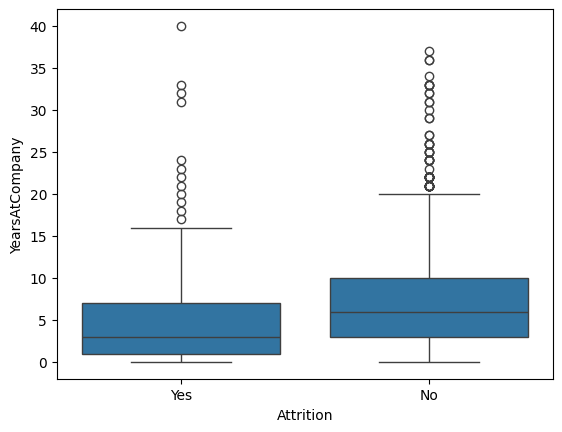

In [12]:
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)

<Axes: xlabel='OverTime', ylabel='count'>

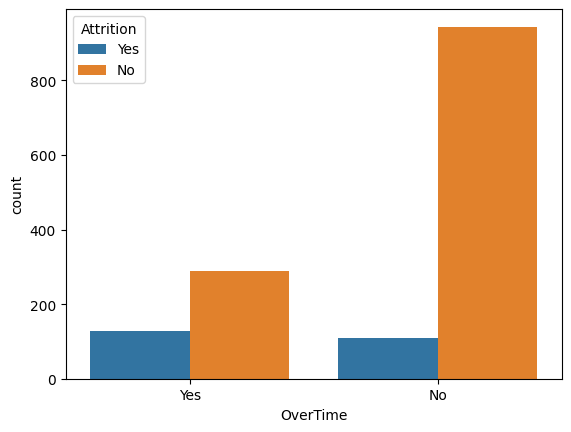

In [13]:
sns.countplot(x='OverTime', hue='Attrition', data=df)

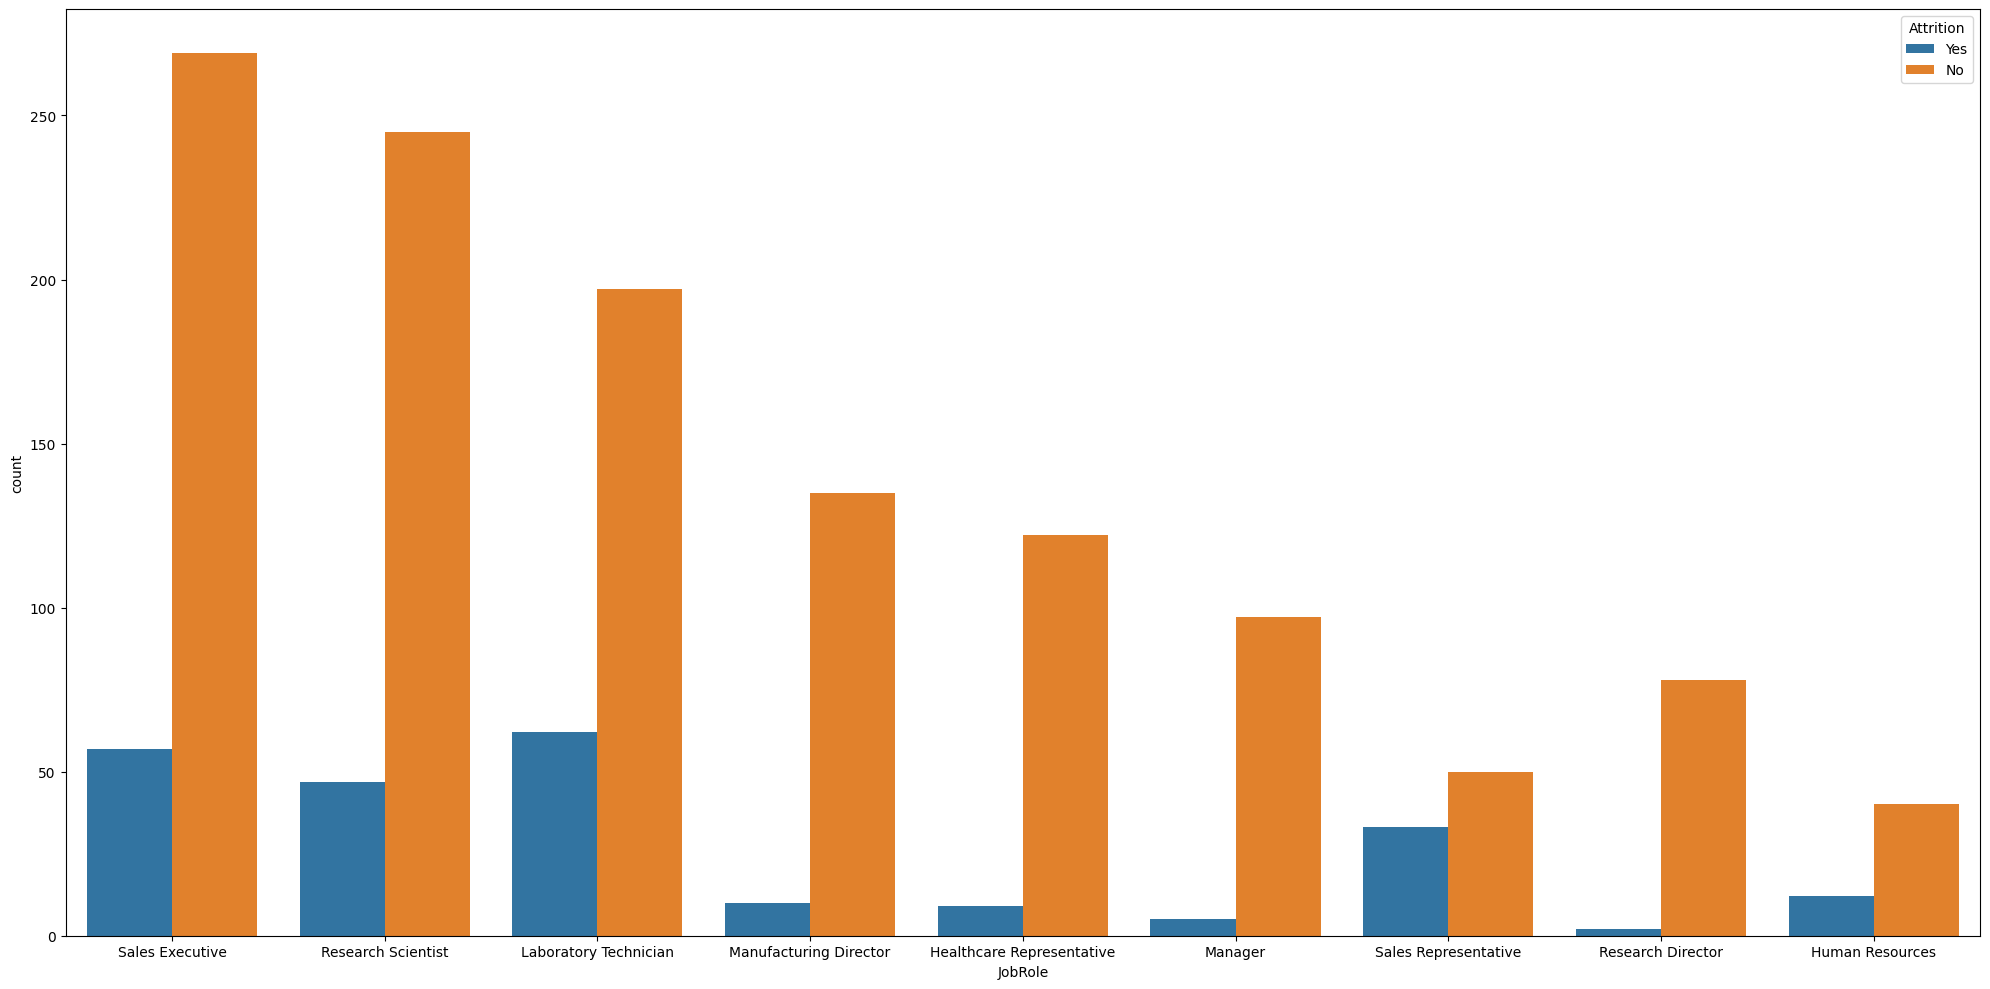

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.tight_layout()

<Axes: xlabel='MaritalStatus', ylabel='count'>

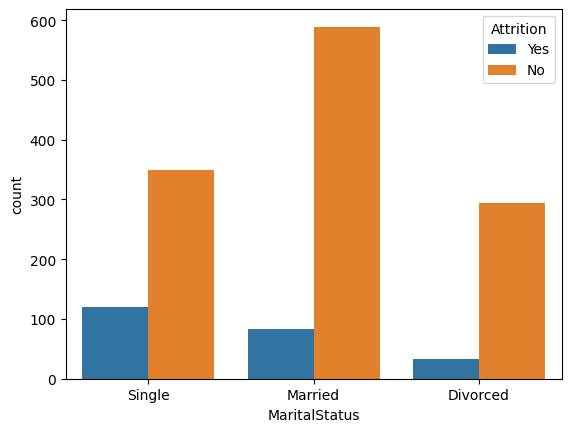

In [15]:
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)

In [16]:
df['MonthlyIncome'] = np.log1p(df['MonthlyIncome']) ## done because of the outliers detected in the code

In [17]:
num_cols = df.select_dtypes(include='number')
cat_cols = df.select_dtypes(include=['str'])

In [18]:
cat_cols

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


## Encoding

In [19]:
from sklearn.preprocessing import OneHotEncoder #, LabelEncoder

In [20]:
ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

ohe_cols = ['Attrition', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'BusinessTravel', 'Department', 'EducationField']

encoded_ohe_cols = ohe.fit_transform(df[ohe_cols])

encoded_ohe_cols_df = pd.DataFrame(encoded_ohe_cols, columns=ohe.get_feature_names_out(ohe_cols), index=df.index)

df = pd.concat([df.drop(columns = ohe_cols), encoded_ohe_cols_df], axis=1)

In [21]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   DailyRate                          1470 non-null   int64  
 2   DistanceFromHome                   1470 non-null   int64  
 3   Education                          1470 non-null   int64  
 4   EmployeeCount                      1470 non-null   int64  
 5   EmployeeNumber                     1470 non-null   int64  
 6   EnvironmentSatisfaction            1470 non-null   int64  
 7   HourlyRate                         1470 non-null   int64  
 8   JobInvolvement                     1470 non-null   int64  
 9   JobLevel                           1470 non-null   int64  
 10  JobSatisfaction                    1470 non-null   int64  
 11  MonthlyIncome                      1470 non-null   float64
 12  Mon

## Correlation Heatmap

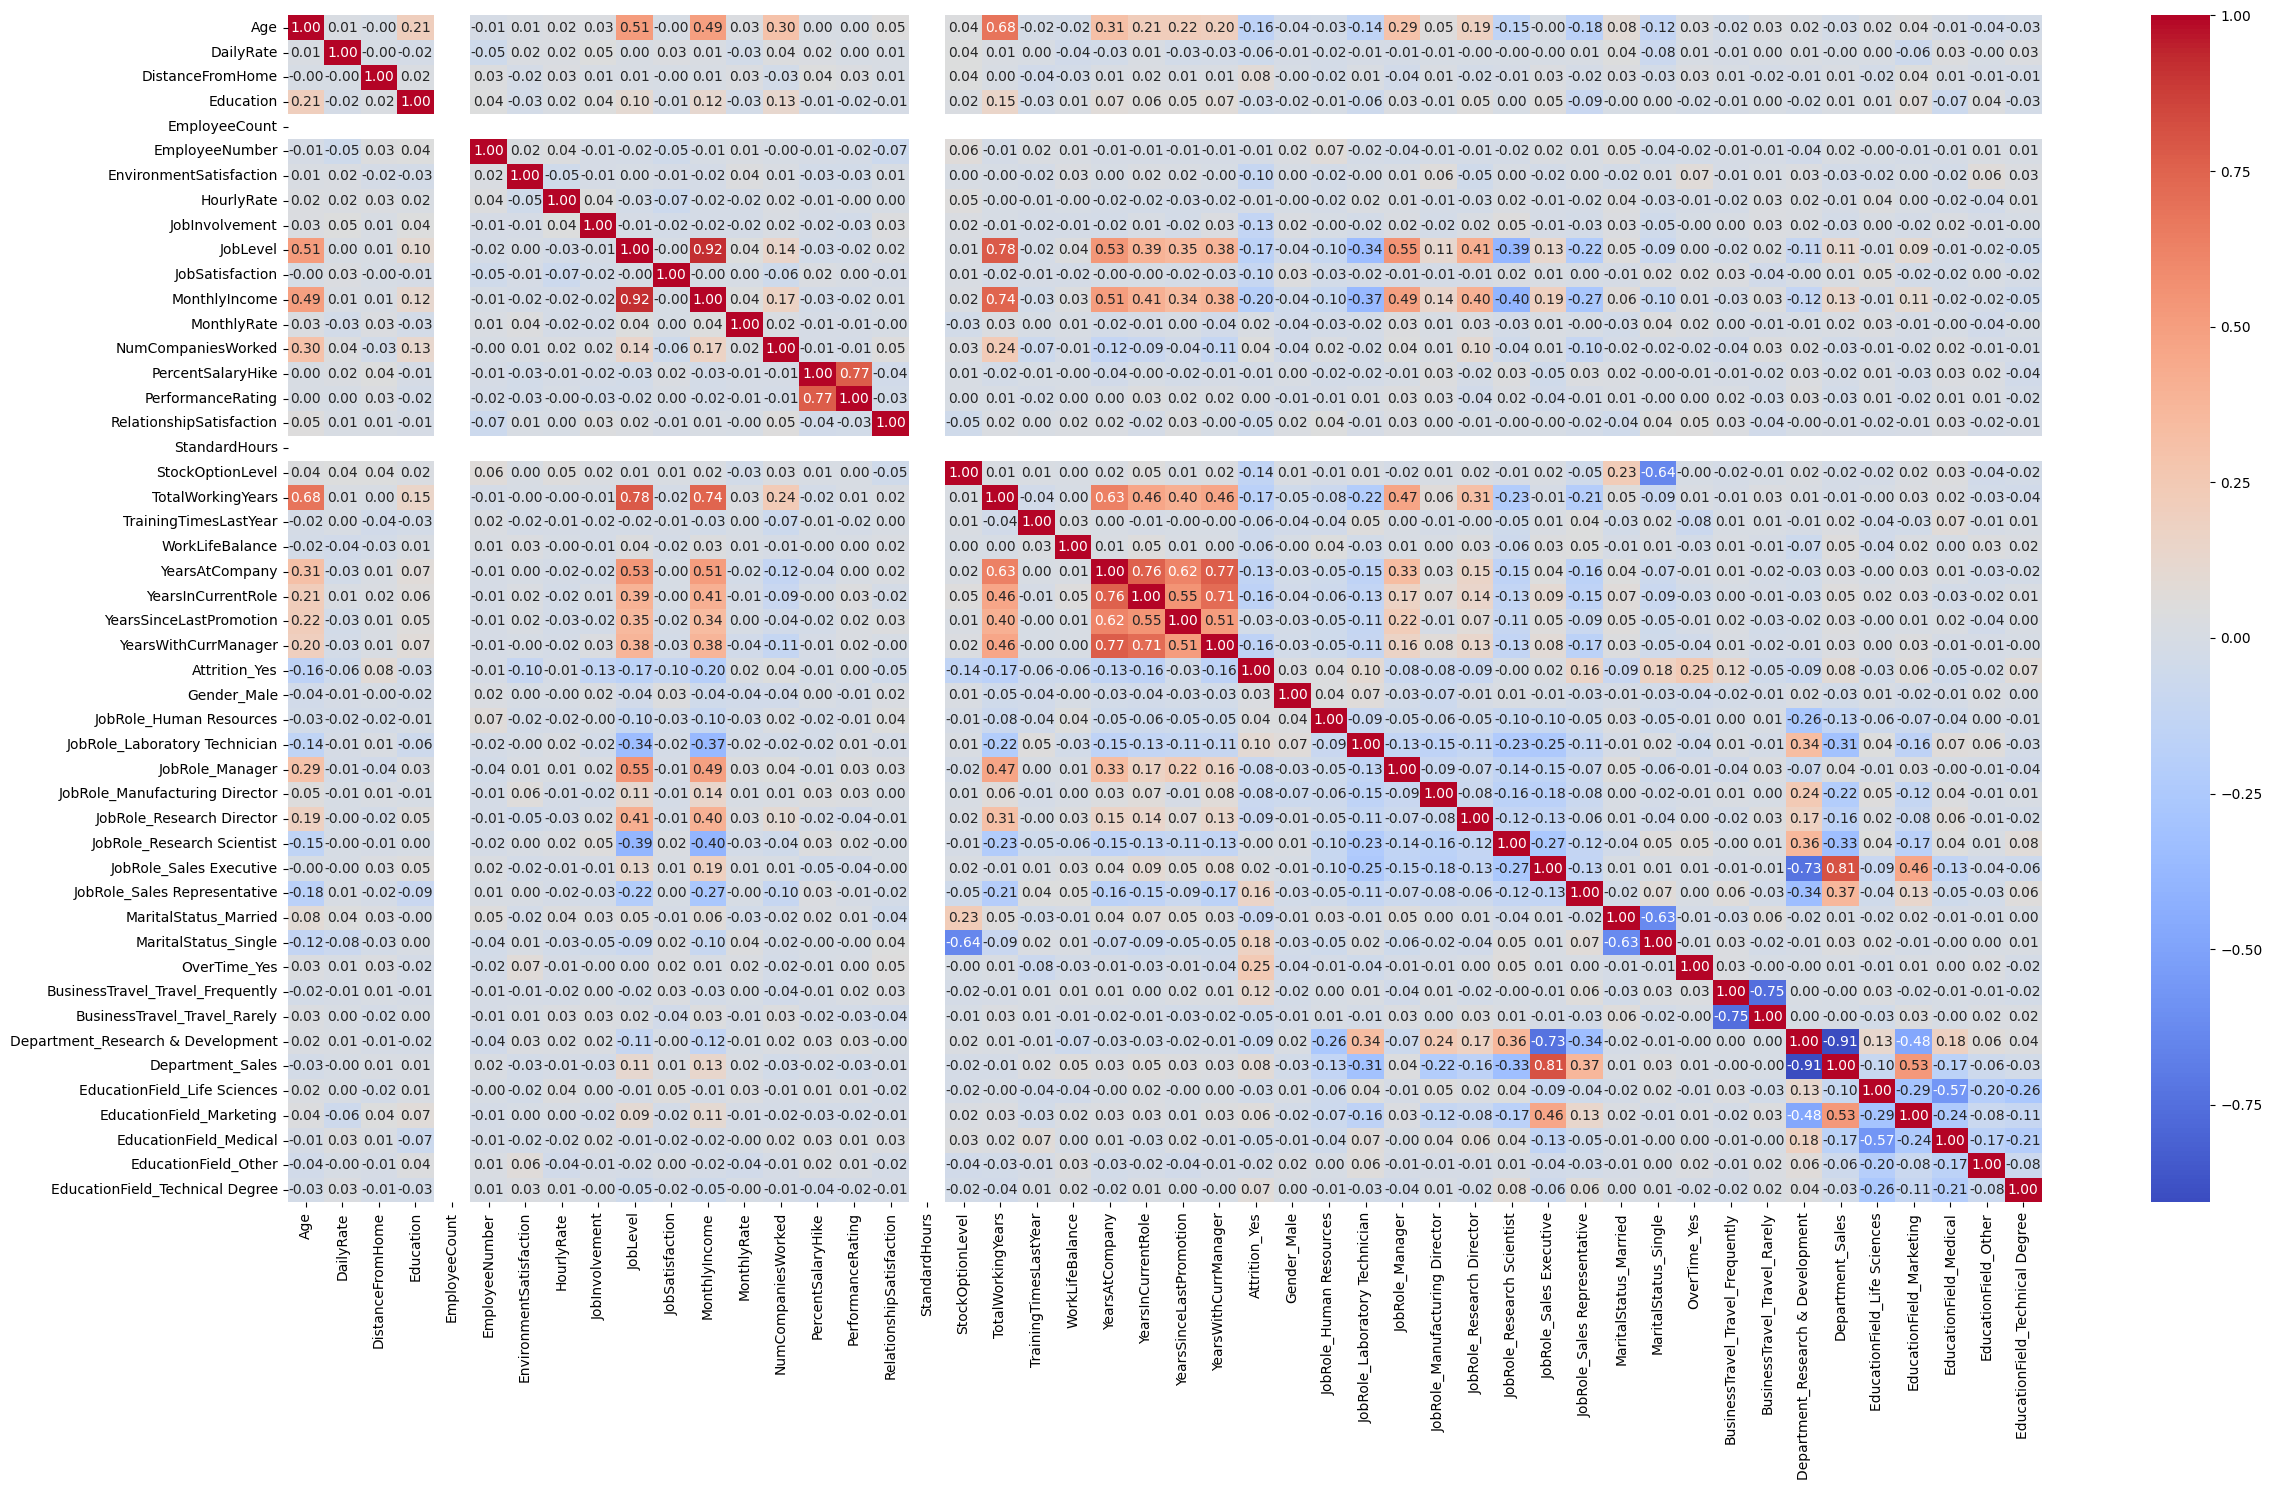

In [22]:
corr_cols = df.select_dtypes(include = 'number')
corr_matrix = corr_cols.corr()

plt.figure(figsize=(25,15))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm'
)

plt.tight_layout()

In [23]:
corr_cols.corr()['Attrition_Yes'].sort_values(ascending=False)

Attrition_Yes                        1.000000
OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
JobRole_Human Resources              0.036215
Gender_Male                          0.029453
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
EmployeeNumber                      -0.010577
PercentSalaryHike                   -0.013478
EducationField_Other                -0.017898
Education                         

## Train-test-split and Feature Scaling

In [24]:
X = df.drop(columns='Attrition_Yes')
y = df['Attrition_Yes']

In [25]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Attrition_Yes, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training and Evaluation

### 1. Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Model")
print("Recall: ", recall_score(y_test, y_pred_log))
print("Accuracy: ", accuracy_score(y_test, y_pred_log))
print("Precision: ", precision_score(y_test, y_pred_log))
print("F1 score: ", f1_score(y_test, y_pred_log))
print("CM: ", confusion_matrix(y_test, y_pred_log))

Logistic Regression Model
Recall:  0.46153846153846156
Accuracy:  0.8877551020408163
Precision:  0.6
F1 score:  0.5217391304347826
CM:  [[243  12]
 [ 21  18]]


### 2. Gaussian Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

GNB_model = GaussianNB()
GNB_model.fit(X_train_scaled, y_train)

y_pred_GNB = GNB_model.predict(X_test_scaled)

# Evaluation
print("Gaussian Naive Bayes Model")
print("Recall: ", recall_score(y_test, y_pred_GNB))
print("Accuracy: ", accuracy_score(y_test, y_pred_GNB))
print("Precision: ", precision_score(y_test, y_pred_GNB))
print("F1 score: ", f1_score(y_test, y_pred_GNB))
print("CM: ", confusion_matrix(y_test, y_pred_GNB))

Gaussian Naive Bayes Model
Recall:  0.6666666666666666
Accuracy:  0.7074829931972789
Precision:  0.26262626262626265
F1 score:  0.37681159420289856
CM:  [[182  73]
 [ 13  26]]


### 3. KNN - K Nearest Neighbour

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluation
print("KNN Model")
print("Recall: ", recall_score(y_test, y_pred_knn))
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Precision: ", precision_score(y_test, y_pred_knn))
print("F1 score: ", f1_score(y_test, y_pred_knn))
print("CM: ", confusion_matrix(y_test, y_pred_knn))

KNN Model
Recall:  0.15384615384615385
Accuracy:  0.8639455782312925
Precision:  0.46153846153846156
F1 score:  0.23076923076923078
CM:  [[248   7]
 [ 33   6]]


### 4. Decision Trees

In [50]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(random_state=55)
DT_model.fit(X_train_scaled, y_train)

y_pred_DT = DT_model.predict(X_test_scaled)

# Evaluation
print("Decision Tree Model")
print("Recall: ", recall_score(y_test, y_pred_DT))
print("Accuracy: ", accuracy_score(y_test, y_pred_DT))
print("Precision: ", precision_score(y_test, y_pred_DT))
print("F1 score: ", f1_score(y_test, y_pred_DT))
print("CM: ", confusion_matrix(y_test, y_pred_DT))

Decision Tree Model
Recall:  0.20512820512820512
Accuracy:  0.7653061224489796
Precision:  0.17391304347826086
F1 score:  0.18823529411764706
CM:  [[217  38]
 [ 31   8]]


####    4.1 Pre-pruning

In [52]:
max_depths = [3,4,5,6,7,8,9,10,11,12]

best_max_depth = 0
best_score = 0

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=55)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    score = f1_score(y_test, y_pred)

    if score > best_score :
        best_max_depth = depth
        best_score = score

print(f"best score : {best_score} at max-depth = {best_max_depth}")

best score : 0.18461538461538463 at max-depth = 5


In [54]:
min_sample_split = [5,10,15,20,25,30,35]

best_score = 0
best_min_sample_split = min_sample_split[0]

for sample_split in min_sample_split:
    model = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=sample_split, random_state=55)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    score = f1_score(y_test, y_pred)
    
    if score > best_score:
        best_score = score
        best_min_sample_split = sample_split

print(f"best f1 score : {best_score} for min_sample_split = {best_min_sample_split}")

best f1 score : 0.1875 for min_sample_split = 25


In [55]:
best_pre_DT_model = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split = best_min_sample_split, random_state=55)
best_pre_DT_model.fit(X_train_scaled, y_train)

y_pred_best_pre_DT = best_pre_DT_model.predict(X_test_scaled)

# Evaluation
print("Decision Tree Model")
print("Recall: ", recall_score(y_test, y_pred_best_pre_DT))
print("Accuracy: ", accuracy_score(y_test, y_pred_best_pre_DT))
print("Precision: ", precision_score(y_test, y_pred_best_pre_DT))
print("F1 score: ", f1_score(y_test, y_pred_best_pre_DT))
print("CM: ", confusion_matrix(y_test, y_pred_best_pre_DT))

Decision Tree Model
Recall:  0.15384615384615385
Accuracy:  0.8231292517006803
Precision:  0.24
F1 score:  0.1875
CM:  [[236  19]
 [ 33   6]]


#### 4.2 Postpruning

In [56]:
post_DT_model = DecisionTreeClassifier(random_state=55)
post_DT_model.fit(X_train, y_train)

y_pred_post_DT = post_DT_model.predict(X_test)

In [57]:
path = post_DT_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

ccp_alphas

array([0.        , 0.00056488, 0.00074405, 0.0007896 , 0.00081169,
       0.00081763, 0.00081885, 0.00081885, 0.00083494, 0.0008361 ,
       0.00083617, 0.00083705, 0.00085034, 0.00111461, 0.00113379,
       0.00122232, 0.00127551, 0.00127551, 0.00127551, 0.00127551,
       0.00127551, 0.00127551, 0.00127551, 0.00132188, 0.00136054,
       0.00136864, 0.00140306, 0.00141723, 0.00141723, 0.00141723,
       0.00145773, 0.00146006, 0.0014881 , 0.00151172, 0.00151172,
       0.00152071, 0.00153061, 0.00154369, 0.00160983, 0.00174429,
       0.00182216, 0.00182474, 0.00184882, 0.00192077, 0.00192235,
       0.00194363, 0.00194758, 0.00204082, 0.00209314, 0.0021963 ,
       0.00253077, 0.00259404, 0.0026164 , 0.00269515, 0.00287807,
       0.00288552, 0.00305442, 0.00310962, 0.00311947, 0.00409639,
       0.00413704, 0.00419065, 0.00431439, 0.00755519, 0.00812254,
       0.02222907])

In [58]:
best_score = 0
best_ccp_alpha = 0.0

for alpha in ccp_alphas:
    model = DecisionTreeClassifier(ccp_alpha=alpha, random_state=55)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    score = f1_score(y_test, y_pred)
    
    if score > best_score:
        best_score = score
        best_ccp_alpha = alpha

print(f"best f1 score : {best_score} for ccp_alpha = {best_ccp_alpha}")

best f1 score : 0.19047619047619047 for ccp_alpha = 0.0005648760097158636


In [60]:
best_post_DT_model = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha, random_state=55)
best_post_DT_model.fit(X_train, y_train)

y_pred_best_post_DT = best_post_DT_model.predict(X_test)

# Evaluation
print("Decision Tree Model")
print("Recall: ", recall_score(y_test, y_pred_best_post_DT))
print("Accuracy: ", accuracy_score(y_test, y_pred_best_post_DT))
print("Precision: ", precision_score(y_test, y_pred_best_post_DT))
print("F1 score: ", f1_score(y_test, y_pred_best_post_DT))
print("CM: ", confusion_matrix(y_test, y_pred_best_post_DT))

Decision Tree Model
Recall:  0.20512820512820512
Accuracy:  0.7687074829931972
Precision:  0.17777777777777778
F1 score:  0.19047619047619047
CM:  [[218  37]
 [ 31   8]]


#### 4.3 pre and post pruning both

In [62]:
best_post_DT_model = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_sample_split, ccp_alpha=best_ccp_alpha, random_state=55)
best_post_DT_model.fit(X_train, y_train)

y_pred_best_post_DT = best_post_DT_model.predict(X_test)

# Evaluation
print("Decision Tree Model")
print("Recall: ", recall_score(y_test, y_pred_best_post_DT))
print("Accuracy: ", accuracy_score(y_test, y_pred_best_post_DT))
print("Precision: ", precision_score(y_test, y_pred_best_post_DT))
print("F1 score: ", f1_score(y_test, y_pred_best_post_DT))
print("CM: ", confusion_matrix(y_test, y_pred_best_post_DT))

Decision Tree Model
Recall:  0.15384615384615385
Accuracy:  0.8231292517006803
Precision:  0.24
F1 score:  0.1875
CM:  [[236  19]
 [ 33   6]]


### 5.Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=501,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    oob_score=True,
    random_state=42
)

rf.fit(X_train, y_train)

y_probs = rf.predict_proba(X_test)[:, 1]

threshold = 0.3

y_pred_rf = (y_probs >= threshold).astype(int)

## Evaluation

print("Random Forest")
print(f'oob score : {rf.oob_score_}')
print(f"accuracy : {accuracy_score(y_test, y_pred_rf)}")
print("Recall: ", recall_score(y_test, y_pred_rf))
print("Precision: ", precision_score(y_test, y_pred_rf))
print("F1 score: ", f1_score(y_test, y_pred_rf))
print("CM: ", confusion_matrix(y_test, y_pred_rf))

Random Forest
oob score : 0.858843537414966
accuracy : 0.7925170068027211
Recall:  0.5384615384615384
Precision:  0.328125
F1 score:  0.4077669902912621
CM:  [[212  43]
 [ 18  21]]


In [97]:
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances
})

feature_importance_df = feature_importance_df.sort_values(
    by="Importance",
    ascending=False
)

feature_importance_df.head(10)

,Feature,Importance
37,OverTime_Yes,0.080435
11,MonthlyIncome,0.073417
0,Age,0.054840
22,YearsAtCompany,0.046999
19,TotalWorkingYears,0.045099
18,StockOptionLevel,0.043889
5,EmployeeNumber,0.043131
1,DailyRate,0.041098
12,MonthlyRate,0.040456
7,HourlyRate,0.038417


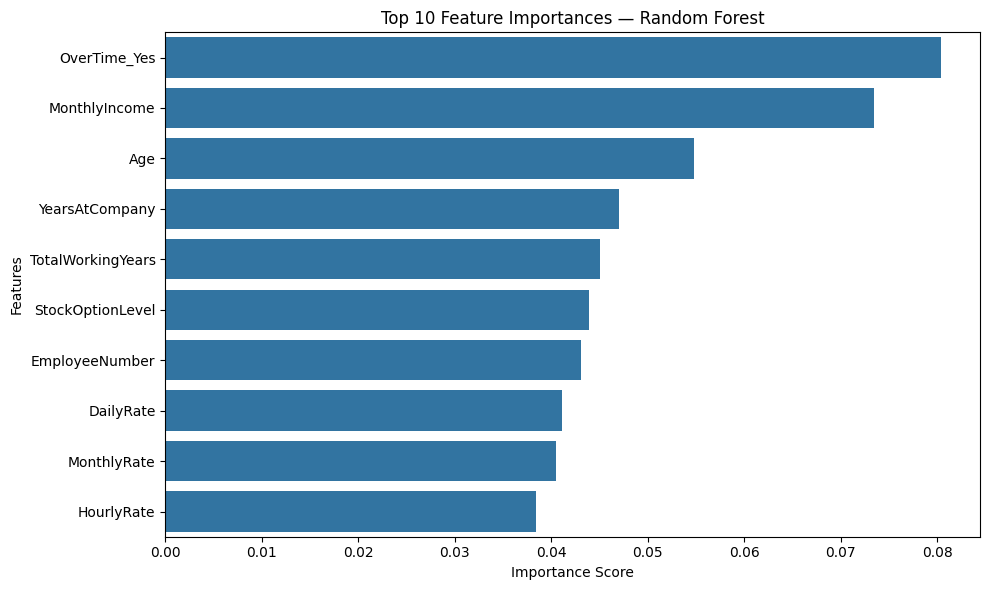

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=feature_importance_df.head(10),
    x="Importance",
    y="Feature"
)

plt.title("Top 10 Feature Importances — Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")

plt.tight_layout()
plt.show()

In [100]:
feature_importance_df

,Feature,Importance
37,OverTime_Yes,0.080435
11,MonthlyIncome,0.073417
0,Age,0.054840
22,YearsAtCompany,0.046999
19,TotalWorkingYears,0.045099
18,StockOptionLevel,0.043889
5,EmployeeNumber,0.043131
1,DailyRate,0.041098
12,MonthlyRate,0.040456
7,HourlyRate,0.038417


### 6. SVM

In [89]:
from sklearn.svm import SVC

svm_model = SVC(
    probability=True,
    class_weight='balanced',
    random_state=42
)

svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

## Evaluation

print("SVM")
print(f"accuracy : {accuracy_score(y_test, y_pred_svm)}")
print("Recall: ", recall_score(y_test, y_pred_svm))
print("Precision: ", precision_score(y_test, y_pred_svm))
print("F1 score: ", f1_score(y_test, y_pred_svm))
print("CM: ", confusion_matrix(y_test, y_pred_svm))

SVM
accuracy : 0.8469387755102041
Recall:  0.48717948717948717
Precision:  0.4318181818181818
F1 score:  0.4578313253012048
CM:  [[230  25]
 [ 20  19]]


## Comparison table

In [90]:
def evaluate_model(name, y_true, y_pred):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }

In [92]:
results = []

results.append(evaluate_model("Logistic Regression", y_test, y_pred_log))
results.append(evaluate_model("Gaussian Naive Bayes", y_test, y_pred_GNB))
results.append(evaluate_model("KNN", y_test, y_pred_knn))
results.append(evaluate_model("Decision Tree", y_test, y_pred_best_post_DT))
results.append(evaluate_model("Random Forest (Tuned)", y_test, y_pred_rf))
results.append(evaluate_model("SVM", y_test, y_pred_svm))

In [95]:
comparison_df = pd.DataFrame(results)

comparison_df = comparison_df.sort_values(by="F1 Score", ascending=False)
comparison_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.887755,0.600000,0.461538,0.521739
5,SVM,0.846939,0.431818,0.487179,0.457831
4,Random Forest (Tuned),0.792517,0.328125,0.538462,0.407767
1,Gaussian Naive Bayes,0.707483,0.262626,0.666667,0.376812
2,KNN,0.863946,0.461538,0.153846,0.230769
3,Decision Tree,0.823129,0.240000,0.153846,0.187500


In [96]:
comparison_df.to_csv("model_comparison.csv", index=False)